<a href="https://colab.research.google.com/github/BenGardiner18/Fran-ois-Chollet-Deep-Learning-with-Python/blob/main/ch4_Reuter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from tensorflow import keras
import numpy as np
from keras import layers
import matplotlib.pyplot as plt

In [ ]:
# importing Reuters newswire datasets
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
            num_words=10000)

print("train data shape: ",train_data.shape)

train data shape:  (8982,)


In [ ]:
word_index = reuters.get_word_index()
reverse_word_index = dict(
  [(value, key) for (key, value) in word_index.items()]) 
decoded_newswire = " ".join(
  [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

print("original: ",train_data[0])
print("decoded: ",decoded_newswire)
print("label: ",train_labels[0])

original:  [1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
decoded:  ? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3
label:  3


In [ ]:
# encoding integer sequences via multi-hot encoding
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences): 
    for j in sequence:
      results[i, j] = 1. 
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

(8982, 10000)


In [ ]:
# one hot encoding labels 
# e.g 4 --> [0,0,0,1,0,...,0]
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels): 
    results[i, label] = 1.
  return results

y_train = to_one_hot(train_labels) 
y_test = to_one_hot(test_labels)

y_train.shape

(8982, 46)

In [ ]:
# model definition
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

In [ ]:
# model compilation
model.compile(optimizer="rmsprop",
                      loss="categorical_crossentropy",
                      metrics=["accuracy"])

In [ ]:
# separting training data into fitting data and validation data
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [ ]:
history = model.fit(partial_x_train,
                           partial_y_train,
                           epochs=20,
                           batch_size=512,
                           validation_data=(x_val, y_val))


Epoch 1/20
16/16 [==============================] - 3s 28ms/step - loss: 2.4724 - accuracy: 0.5380 - val_loss: 1.6646 - val_accuracy: 0.6490
Epoch 2/20
16/16 [==============================] - 0s 16ms/step - loss: 1.3841 - accuracy: 0.7058 - val_loss: 1.3198 - val_accuracy: 0.7030
Epoch 3/20
16/16 [==============================] - 0s 16ms/step - loss: 1.0481 - accuracy: 0.7689 - val_loss: 1.1613 - val_accuracy: 0.7430
Epoch 4/20
16/16 [==============================] - 0s 17ms/step - loss: 0.8286 - accuracy: 0.8197 - val_loss: 1.0408 - val_accuracy: 0.7740
Epoch 5/20
16/16 [==============================] - 0s 16ms/step - loss: 0.6569 - accuracy: 0.8607 - val_loss: 0.9854 - val_accuracy: 0.7880
Epoch 6/20
16/16 [==============================] - 0s 16ms/step - loss: 0.5193 - accuracy: 0.8909 - val_loss: 0.9481 - val_accuracy: 0.7920
Epoch 7/20
16/16 [==============================] - 0s 15ms/step - loss: 0.4167 - accuracy: 0.9136 - val_loss: 0.9260 - val_accuracy: 0.8080
Epoch 8/20
16

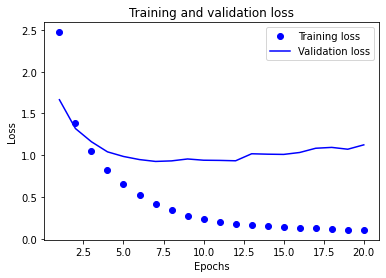

In [ ]:

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


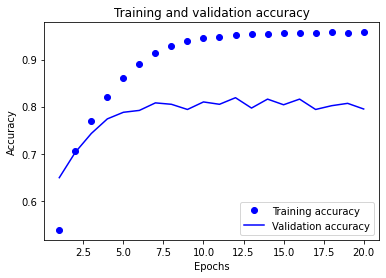

In [ ]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [ ]:
model.fit(x_train,
  y_train,
  epochs=9,
  batch_size=512)

results = model.evaluate(x_test, y_test)
print("\nloss: ",results[0],"\naccuracy: ",results[1])


Epoch 1/9
18/18 [==============================] - 0s 14ms/step - loss: 0.0824 - accuracy: 0.9570
Epoch 2/9
18/18 [==============================] - 0s 13ms/step - loss: 0.0836 - accuracy: 0.9560
Epoch 3/9
18/18 [==============================] - 0s 13ms/step - loss: 0.0848 - accuracy: 0.9550
Epoch 4/9
18/18 [==============================] - 0s 13ms/step - loss: 0.0818 - accuracy: 0.9567
Epoch 5/9
18/18 [==============================] - 0s 13ms/step - loss: 0.0809 - accuracy: 0.9562
Epoch 6/9
18/18 [==============================] - 0s 12ms/step - loss: 0.0811 - accuracy: 0.9569
Epoch 7/9
18/18 [==============================] - 0s 13ms/step - loss: 0.0801 - accuracy: 0.9554
Epoch 8/9
18/18 [==============================] - 0s 13ms/step - loss: 0.0802 - accuracy: 0.9571
Epoch 9/9
71/71 [==============================] - 0s 3ms/step - loss: 1.6620 - accuracy: 0.7792

loss:  1.662014126777649 
accuracy:  0.7791629433631897
